# Daftar Isi

- [Daftar Isi](#daftar_isi)
- [Pengantar Proyek](#pengantar_proyek)
- [Tujuan Proyek](#tujuan_proyek)
- [Memuat seluruh Library dan Membaca filenya](#memuat_seluruh)
    - [Memuat seluruh Library](#memuat_library)
    - [Memuat seluruh file](#memuat_file)
    - [Memuat informasi data](#memuat_informasi)
- [Pra-Pemrosesan Data](#pra_pemrosesan)
    - [Mengganti nama kolom](#nama_kolom)
    - [Analisa nilai hilang dan mengisi nilai yang hilang](#analisa_nilai)
        - [Solusi untuk nilai NaN di kolom name](#solusi_nama)
        - [Solusi untuk nilai NaN di kolom tahun perilisan](#solusi_tahun)
            - [Memasuki Proses tahap pertama untuk mengisi nilai yang hilang](#tahap_satu)
            - [Memasuki Proses tahap kedua untuk mengisi nilai yang hilang](#tahap_2)
        - [Solusi untuk nilai NaN di kolom critic score](#critic_score)
        - [Solusi untuk nilai NaN di kolom user score](#user_score)
        - [Solusi untuk nilai NaN di kolom rating](#rating)
    - [Mengganti tipe data untuk kolom diperlukan](#tipe_data)
    - [Membuat kolom baru untuk menghitung jumlah penjualan
](#jumlah_penjualan)
- [Exploratory Data Analysis](#exploratory_analysis)
    - [Analisa untuk jumlah game rilis berdasarkan tahun](#analisa_tahun)
    - [Analisa untuk platform](#analisa_platform)
    - [Melihat hubungan antara rating profesional dan rating user terhadap tingkat penjualan game di maisng-masing platform](#hubungan_rating_penjualan)
        - [Korelasi Score dan Penjualan pada Platform 3DS](#korelasi_3ds)
        - [Korelasi Score dan Penjualan pada Platform PC](#korelasi_pc)
        - [Korelasi Score dan Penjualan pada Platform PS3](#korelasi_ps3)
        - [Korelasi Score dan Penjualan pada Platform PS4](#korelasi_ps4)
        - [Korelasi Score dan Penjualan pada Platform PSV](#korelasi_psv)
        - [Korelasi Score dan Penjualan pada Platform Wii](#korelasi_wii)
        - [Korelasi Score dan Penjualan pada Platform WiiU](#korelasi_wiiu)
        - [Korelasi Score dan Penjualan pada Platform X360](#korelasi_x360)
        - [Korelasi Score dan Penjualan pada Platform XOne](#korelasi_xone)
    - [Analisa untuk genre game](#analisa_genre)
    - [Analisa berdasarkan wilayah](#analisa_wilayah)
        - [Analisa Platform, Genre, dan Rating untuk Game di wilayah NA](#wilayah_na)
        - [Analisa Platform, Genre, dan Rating untuk Game di wilayah EU](#wilayah_eu)
        - [Analisa Platform, Genre, dan Rating untuk Game di wilayah JP](#wilayah_jp)
- [Melakukan Uji Hipotesis](#uji_hipotesis)
    - [Uji Hipotesis untuk rating pengguna Xbox One (XOne) dan PC](#hipotesis_platform)
    - [Uji Hipotesis untuk rating user game genre Action dan Sport](#hipotesis_genre)
- [Ringakasan, Kesimpulan, & Saran](#terakhir)
    - [Ringkasan](#ringkasan)
    - [Kesimpulan](#kesimpulan)
    - [Saran](#saran)

# Pendahuluan

Setiap kali kita melakukan penelitian, kita perlu merumuskan hipotesis yang kemudian dapat kita uji. Terkadang kita menerima hipotesis ini; tetapi terkadang kita juga menolaknya. Untuk membuat keputusan yang tepat, sebuah bisnis harus dapat memahami apakah asumsi yang dibuatnya benar atau tidak.

Dalam proyek kali ini, diminta untuk melihat game-game yang dimana akan mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak dari data yang ada. Dengan begitu, bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.

# Pengantar Proyek

Anda bekerja di toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Anda perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Anda bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.

Di depan Anda tersedia data dari tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan Anda sedang merencanakan kampanye untuk tahun 2017.

(Saat ini, yang terpenting bagi Anda adalah untuk mendapatkan pengalaman bekerja dengan data. Tidak masalah apakah Anda meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2027 berdasarkan data dari tahun 2026.).

Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

# Tujuan Proyek

Proyek ini ditujukan untuk mengidentifikasi suatu pola dari game yang dikatakan gamenya berhasil dijual untuk mendapatkan keuntungan dari data penjualan game yang terdiri dari nama game, plaformnya, tahun perilisan, penjualan untuk masing-masing daerah (NA, EU, dan JP), critic score, dan user score. Yang dimana nanti akan akan menemukan game yang paling berpotensi untuk mendapatkan penjualannya dan akan merencanakan kampanye iklan dari game tersebut.


# Tahapan Proyek

Data tentang suatu pola game disimpan dalam berkas `/datasets/games.csv`. Tidak ada informasi tentang kualitas data, jadi perlu memeriksanya lebih dahulu sebelum menguji hipotesis.

Adapun agar tujuan tersebut tercapai perlu melakukan tahap-tahap untuk menganalisa pola suatu game yang dikatakan berhasil dari data tesebut dengan melakukan analisa, yaitu:

- Melihat informasi data
- Pra-Pemrosesan
- Eksplorasi Analisa data
- Uji Hipotesis
- Kesimpulan

# Memuat seluruh Library dan Membaca filenya

## Memuat seluruh Library

In [ ]:
# Membuat semua Libary
import pandas as pd, numpy as np
# Memuat Data Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
# Membuat Uji Statistik
import scipy.stats as st
# Menyembunyikan warning
import warnings

In [ ]:
# Membuat set kolom untuk kolom bisa dibaca jika panjang
pd.set_option('display.max_columns', 100)
# Membuat warning untuk di abaikan dan disembunyikan
warnings.filterwarnings('ignore')

## Memuat seluruh file

In [ ]:
# Memuat file games
data_game = pd.read_csv('/datasets/games.csv')

## Memuat informasi data

In [ ]:
# Melihat file tabel data_game
data_game

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Melihat semua kolomnya
data_game.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
# Melihat jumlah baris dan kolom
data_game.shape

(16715, 11)

In [ ]:
# Melihat informasi keseluruhan pada tabel data_game
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Melihat distribusi data pada tabel data_game
data_game.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Melihat distribusi data kategorik pada tabel data_game
data_game.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [ ]:
# Melihat jumlah nilai yang hilang untuk semua kolom
data_game.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
# Melihat jumlah presentase untuk nilai yang hilang di semua kolom
data_game.isna().sum() / len(data_game) * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [ ]:
# Melhat tipe data untuk masing-masing kolom
data_game.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [ ]:
# Melihat dan mengecek untuk duplikasi
data_game.duplicated().sum()

0

Setelah melihat semua informasi yang diperlukan, maka dapat disimpulkan untuk beberapa poin:

- Nama kolom yang harus diperbaiki.
- Memiliki jumlah baris sebanyak 16715 dan kolom sebanyak 11.
- Lebih dari setengahnya pada jumlah kolom memiliki nilai yang hilang.
- Tipe data yang tidak sesuai karena nilai yang hilang
- Ada beberapa kolom yang jumlah presentase nilai hilangnya sangat besar, bahkan ada yang lebih dari 50%.
- Ada beberapa kolom yang nilai maksnya jauh dari median maupun mean, apakah outlier atau tidak.

# Pra-Pemrosesan Data

## Mengganti nama kolom

In [ ]:
# Mengganti nama kolom
data_game.columns = data_game.columns.str.lower()

In [ ]:
# Melihat kolom setelah di benarkan untuk nama kolom
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# melihat nilai string pada kolom genre
data_game['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

## Analisa nilai hilang dan mengisi nilai yang hilang

Dikarenakan ada beberapa kolom yang tidak bisa diubah sebelum menghilangkan/mengganti nilai `NaN`, maka perlu untuk menganalisa dan mengisi nilai yang hilang tersebut dimasing-masing kolom.

In [ ]:
# melihat kolom-kolom yang mempunyai nilai NaN / Missing Value
data_game.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Terdapat nilai yang hilang dengan jumlah sama, yaitu pada kolom `name` dan kolom `genre`. Apakah sebuah pola atau bukan perlu analisa lebih lanjut untuk melihat secara langusng.

### Solusi untuk nilai NaN di kolom name

In [ ]:
# Mengecek jumlah nilai yang hilang di kolom name
data_game['name'].isna().sum()

2

In [ ]:
# Mengecek dan melihat nilai yang hilang di kolom name
data_game.loc[data_game['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ternyata untuk nilai yang hilang pada kolom `name` maka juga hilang pada kolom `genre`. Maka hal ini merupkan pola.

Untuk nilai yang hilang di kolom `name` dan `genre` setelah di lihat bahwa keputusan terbaik adalah dengan menghilangkan baris tersebut, karena informasi yang didapat tidak bisa dianalisa lebih lanjut dan banyak sekali informasi yang hilang.

In [ ]:
# Menghilangkan baris tersebut & mereset indexnya
data_game = data_game.dropna(subset=['name'])

In [ ]:
# Mengecek kembali jumlah nilai yang hilang di kolom name setelah di bersihkan
data_game['name'].isna().sum()

0

In [ ]:
# Mengecek kembali jumlah nilai yang hilang di kolom genre setelah di bersihkan
data_game['genre'].isna().sum()

0

In [ ]:
# Mengecek dan melihat nilai yang hilang di kolom name setelah di bersihkan
data_game.loc[data_game['name'].isna() & data_game['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Setelah di cek kembali, nilai yang hilang sudah tidak ada. Sehingga siap untuk dilakukan tahap berikutnya untuk kolom ini.

### Solusi untuk nilai NaN di kolom tahun perilisan

In [ ]:
# Melihat distribusi value untuk kolom year of release
data_game['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [ ]:
# Mengecek jumlah nilai yang hilang di kolom year_of_release
data_game['year_of_release'].isna().sum()

269

In [ ]:
# Mengecek dan melihat nilai yang hilang di kolom year_of_release
data_game.loc[data_game['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


sangat sedikit untuk nilai yang hilang di kolom ini, tapi perlu analisa lebih lanjut untuk melihat unique value di kolom `year_of_release` yang hilang. Dan perlu membuat varibael baru untuk pengecekan nilai yang hilang.

In [ ]:
# membuat variabel bru untuk analisa lebih lanjut
year_missing = data_game.loc[data_game['year_of_release'].isna()]

In [ ]:
# Memeriksa unique untuk nilai year_of_release hilang atau missing
year_missing['name'].sort_values().unique()

array(['AKB1/48: Idol to Guam de Koishitara...',
       'Action Man-Operation Extreme', 'Advance Wars: Days of Ruin',
       'Adventure', 'Agarest Senki: Re-appearance', 'Air-Sea Battle',
       'Alex Rider: Stormbreaker', 'All-Star Baseball 2005',
       'Alone in the Dark: The New Nightmare',
       'Aquaman: Battle for Atlantis',
       'Atsumare! Power Pro Kun no DS Koushien',
       'B.L.U.E.: Legend of Water', 'Backbreaker', 'Battle vs. Chess',
       'Bejeweled 3', 'Beyond the Labyrinth', 'Big Beach Sports 2',
       'Bikkuriman Daijiten', 'BioShock 2', 'Breakaway IV',
       'Brothers in Arms: Furious 4',
       'Build-A-Bear Workshop: Friendship Valley',
       "Cabela's Alaskan Adventure", 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Captain America: Super Soldier',
       'Charm Girls Club: My Fashion Mall',
       'Charm Girls Club: My Fashion Show', 'Chou Soujuu Mecha MG',
       'Circus Atari', 'Clockwork Empires', 'College Hoops 2K6', 'Combat',
       'Combat Eli

In [ ]:
# Meliaht kembali nilai yang hilang year of release pada varibael year missing
year_missing.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       115
user_score          94
rating              88
dtype: int64

In [ ]:
# Membuat presentase jumlah nilai yang hilang
data_game.isna().sum() / len(data_game) * 100

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64

Sangat sedikit jenis game yang nilai tahun perilisannya hilang, karena banyak maka diperlukan beberapa sampel random untuk mengecek apakah ada game yang mempunyai nama yang sama tetapi memiliki tahun perilisan yang berbeda.

In [ ]:
# Sampel 1
data_game.loc[data_game['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [ ]:
# Sampel 2
data_game.loc[data_game['name'] == 'Jurassic Park: The Game']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8680,Jurassic Park: The Game,X360,NaN,Action,0.15,0.0,0.0,0.01,60.0,3.6,T


In [ ]:
# Sampel 3
data_game.loc[data_game['name'] == 'Godzilla: Destroy All Monsters Melee']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2872,Godzilla: Destroy All Monsters Melee,GC,2002.0,Fighting,0.55,0.14,0.0,0.02,73.0,7.8,T
9830,Godzilla: Destroy All Monsters Melee,XB,NaN,Fighting,0.09,0.03,0.0,0.00,71.0,6.8,T


In [ ]:
# Sampel 4
data_game.loc[data_game['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Sampel 5
data_game.loc[data_game['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


Setelah melihat sampelnya, dapat disimpulkan bahwa ada beberapa varian untuk tahun perilisannya seperti:
- Nama game yang sama, tetapi tahun perilisan berbeda-beda.
- Nama game yang sama dan tahun perilisannya sama.
- Nama game yang sama dan semuanya tidak ada tahun perilisannya.


Maka, saya memutuskan untuk melakukan dua tahap:

- Pertama, saya akan mengisi baris nama game terlebih dahulu dengan tahun yang ada di nama game yang tahun perilisannya sudah ada. Untuk tahap ini saya menggunakan tahunnya yaitu dengan `modus` atau nilai yang paling sering muncul, hal ini lebih masuk akal ketimbangan menggunakan `median` atau `mean`. Karena kalau `median` ada kemungkinan nilai tengahnya adalah `NaN` maka takutnya akan balik lagi nialinya menjadi `NaN` atau kalau ada jumlah barisnya ternyata genap maka ada dua nilai yang nanti dibagi dan ada kemungkinan akan menghasilkan nilai desimal atau `NaN` maka itu menjadi tidak masuk akal. Sedangkan kalau `mean` ada kemungkinan hasilnya adalah desimal atau `NaN` maka itu menjadi tidak masuk akal juga.
- Kedua, sisanya data akan didrop. Karena sisa data-data tersebut informasi untuk `critic_score`, `user_score`, dan `rating` juga hilang, maka keputusan terbaik adalah di drop.

#### Memasuki Proses tahap pertama untuk mengisi nilai yang hilang

In [ ]:
# Mengetes nilai modus untuk contoh
data_game.loc[(data_game['name'] == 'LEGO Batman: The Videogame') & ~(data_game['year_of_release'].isna()), 'year_of_release'].mode()

0    2008.0
dtype: float64

In [ ]:
# Membuat kolom baru untuk menguji fungsinya
data_game['year_of_release_sample'] = data_game['year_of_release']

In [ ]:
# Melakukan tahap pertama
# Membuat fungsi untuk mengisi nilai yang hilang dengan tambahan informasi tertentu
def data_imputation(data_game, column_grouping, column_selected):
    group = data_game[column_grouping].unique()
    for rule in group:
        try:
            modus = data_game.loc[(data_game[column_grouping] == rule) & ~(data_game[column_selected].isna()), column_selected].mode()[0]
        except:
            return data_game
        data_game.loc[(data_game[column_grouping] == rule) & (data_game[column_selected].isna()), column_selected] = modus
    return data_game

In [ ]:
# Pengisian nilai null di kolom baru dan menguji fungsinya
data_game['year_of_release_sample'] = data_imputation(data_game, column_grouping='name', column_selected='year_of_release_sample')['year_of_release_sample']

In [ ]:
# Mengecek kembali untuk game yang mempunyai nilai modus
data_game.loc[data_game['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_sample
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,2008.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,2008.0
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+,2008.0
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,2008.0
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,2008.0
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,2008.0
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,2008.0


In [ ]:
# Mengecek bahwa fungsinya tidak menggangu untuk data yang tidak mempunyai nilai modus
data_game.loc[data_game['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_sample
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN,1994.0
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN,1999.0
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN,2002.0


In [ ]:
# Mengecek bahwa fungsinya tidak menggangu untuk data yang tahunnya tidak ada semua
data_game.loc[data_game['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_sample
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,NaN
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,NaN
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,NaN
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T,NaN


Melihat ketiga contoh `year_of_release_sample` yang berbeda-beda yang dimana mempunyai `year_of_release_sample` yang sama semua, yang satunya tidak mempunyai modus, dan satunya lagi `year_of_release_sample` adalah `NaN` semua. Dan hal ini membuktikan bahwa fungsi tersebut bisa berjalan dengan baik tanpa menggangu data-data yang tidak mempunyai modus atau nilainya hilang semua.

In [ ]:
# Harusnya pengaplikasiannya tahap terakhir
# Aplikasikan untuk year_of_release_sample ke year_of_release
data_game['year_of_release'] = data_game['year_of_release_sample']

In [ ]:
# melakukan drop kolom untuk year_of_release_sample
data_game = data_game.drop('year_of_release_sample', axis=1)

In [ ]:
# pengecekan
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Mencoba yang terbaik, meskipun hanya bisa sedikit yang bisa diselamatkan :')

#### Memasuki Proses tahap kedua untuk mengisi nilai yang hilang

In [ ]:
# Mengecek kembali untuk sisa data yang masih hilang 
data_game['year_of_release'].isna().sum()

256

In [ ]:
# Menghilangkan baris untuk data tahun perilisannya hilang
data_game = data_game.dropna(subset=['year_of_release']).reset_index()

In [ ]:
# Mengecek kembali
data_game['year_of_release'].isna().sum()

0

Untuk kolom year sudah selesai menghilangkan missing value, dan data siap di proses tahap selanjutnya.

### Solusi untuk nilai NaN di kolom critic score

In [ ]:
# Mengecek jumlah nilai yang hilang di kolom critic_score
data_game['critic_score'].isna().sum()

8462

In [ ]:
# Melihat presentase nilai hilangnya
data_game['critic_score'].isna().sum() / len(data_game['critic_score']) * 100

51.41884912195418

Hal terbaik untuk solusi missing value yang bahkan lebih dari 50%, data tersebut harus diubah menjadi nilai 0. Karena bisa dianggap bahwa data ini masih bisa diupdate untuk score-nya.

In [ ]:
# Mengubah nilai NaN menjadi 0
data_game['critic_score'] = data_game['critic_score'].fillna(0)

In [ ]:
# Melihat valuenya setelah di ganti dari NaN ke 0
data_game['critic_score'].sort_values().unique()

array([ 0., 13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98.])

In [ ]:
# Mengecek jumlah nilai yang hilang di kolom critic_score
data_game['critic_score'].isna().sum()

0

Untuk kolom `critic_score` sudah selesai menghilangkan missing value, dan data siap di proses tahap selanjutnya.

### Solusi untuk nilai NaN di kolom user score

In [ ]:
# Mengecek jumlah nilai yang hilang di kolom user_score
data_game['user_score'].isna().sum()

6606

In [ ]:
# Melihat presentase nilai hilangnya di kolom user_score
data_game['user_score'].isna().sum() / len(data_game['user_score']) * 100

40.14097344595005

In [ ]:
# Melihat valuenya 
data_game['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Hal terbaik untuk solusi missing value yang bahkan lebih dari 40% ditambah ada `TBD` (akan ditentukan) membuat missing valuenya semakin besar, data tersebut harus diubah menjadi nilai 0. Karena bisa dianggap bahwa data ini masih bisa diupdate untuk score-nya.

In [ ]:
# Mengubah nilai NaN dan TBD menjadi 0
data_game['user_score'] = data_game['user_score'].fillna(0)
data_game['user_score'] = data_game['user_score'].replace('tbd', 0)

In [ ]:
# Mengecek jumlah nilai yang hilang di kolom user_score
data_game['user_score'].isna().sum()

0

In [ ]:
# Melihat valuenya setelah di ganti dari NaN dan TBD ke 0
data_game['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Untuk kolom `user_score` sudah selesai menghilangkan missing value, dan data siap di proses tahap selanjutnya.

### Solusi untuk nilai NaN di kolom rating

In [ ]:
# Mengecek jumlah nilai yang hilang di kolom rating
data_game['rating'].isna().sum()

6677

In [ ]:
# Melihat presentase nilai hilangnya di kolom rating
data_game['rating'].isna().sum() / len(data_game['rating']) * 100

40.5724008020903

In [ ]:
# Melihat valuenya 
data_game['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Adapun penjelasan tentang rating masing-masing:
- AO - Adults Only 18+ 
- E - Everyone
- E10+ - Everyone 10 and older
- EC - Early childhood
- K-A - Kids to Adults
- M - Mature
- RP - Rating Pending 
- T -Teen

Untuk nilai yang hilang, akan diubah dengan `unidentified` karena bisa saja kesalahan sistem, terlebih datanya yang hilang lebih dari 40%.

In [ ]:
# Mengubah nilai NaN menjadi unidentified dan meluhat hasilnya
data_game['rating'] = data_game['rating'].fillna('Unidentified')
data_game['rating'].value_counts()

Unidentified    6677
E               3927
T               2906
M               1537
E10+            1397
EC                 8
K-A                3
AO                 1
RP                 1
Name: rating, dtype: int64

Untuk kolom `rating` sudah selesai menghilangkan missing value, dan data siap di proses tahap selanjutnya.

In [ ]:
# Mengecek kembali semua nilai NaN sudah hilang semua atau belum
data_game.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

data untuk semua kolom terisi semua, dan siap untuk diproses pada tahap selanjutnya.

## Mengganti tipe data untuk kolom diperlukan

Sebelum mengganti kolom, dilihat terlebih dahulu untuk masing-masing tipenya untuk semua kolom.

In [ ]:
# Melhat tipe data untuk masing-masing kolom
data_game.dtypes

index                int64
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Ada beberapa kolom yang perlu di ubah tipe datanya, yaitu:
- `year_of_release`
- `critic_score`
- `user_score`

Ketiga kolom ini perlu diubah menjadi tipe kolom `int64`. Tapi, sebelum diubah perlu melihat terlebih dahulu uniquenya untuk `critic_score` dan `user_score` apakah benar-benar diubah ke `int` atau tidak.

Karena nilai pada kolom `year_of_release` dan `critic_score` tidak mempunyai bilang desimal, sementara kolom `user_score` mempunyai nilai desimal maka sudah ditentukan, bahwa:
- `year_of_release` dan `critic_score` akan dijadikan ke tipe `int`, karena tidak mempunyai desimal.
- `user_score` akan dijadikan ke tipe `float`, karena mempunyai desimal.

Karena nilai pada `critic_score` dan `user_score` ada nilai `NaN` maka perlu diubah dulu tipe `NaN` agar bisa masuk ke tipe `int` dan `float` di kolom masing-masing.

In [ ]:
# Megubah kolom year_of_release menjadi int
data_game['year_of_release'] = data_game['year_of_release'].astype(int)

In [ ]:
# Megubah critic_score kolom menjadi int
data_game['critic_score'] = data_game['critic_score'].astype(int)

In [ ]:
# Megubah kolom user_score menjadi float
data_game['user_score'] = pd.to_numeric(data_game['user_score'])

In [ ]:
# Melhat tipe data untuk masing-masing kolom
data_game.dtypes

index                int64
name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

Semua tipe-tipe data yang perlu diubah sudah dilakukan agar bisa diproses tahap selanjutnya,

## Membuat kolom baru untuk menghitung jumlah penjualan

Karena diminta untuk menghitung total semua penjualan, maka dibuat kolom baru untuk menghitungnya.

In [ ]:
# Membuat kolom baru untuk menghitung semua penjualan dari masing-masing daerah
data_game['total_sales']= data_game['na_sales'] + data_game['eu_sales'] + data_game['jp_sales'] + data_game['other_sales']

In [ ]:
# Melihat kolom baru untuk menghitung semua penjualan dari masing-masing daerah
data_game.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Unidentified,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Unidentified,31.38


Kolom `total_sales` sudah ditambahkan beserta dengan nilai value yang berisikan total penjualan pada masing-masing daerah, dan siap untuk dilakukan proses selanjutnya yang berkaitan dengan kolom `total_sales` tersebut.

# Exploratory Data Analysis

Tahap 3. Analisis datanya

- Tinjau berapa banyak game yang dirilis pada tahun yang berbeda. Apakah data di setiap periode signifikan?
- Lihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pilih platform dengan total penjualan terbesar dan buatlah distribusinya berdasarkan data per tahun. Temukan platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun. Berapa lama umumnya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?
- Tentukan periode waktu pengambilan data. Untuk melakukannya, lihat jawaban Anda atas pertanyaan sebelumnya. Data yang Anda ambil seharusnya memungkinkan Anda untuk membangun acuan bagi tahun 2017.
- Bekerjalah hanya dengan data yang Anda putuskan relevan. Abaikan data untuk tahun-tahun sebelumnya.
- Platform mana saja yang memiliki penjualan terbanyak? Platform mana saja yang tumbuh atau menyusut? Pilih beberapa platform yang berpotensi menghasilkan keuntungan.
- Buatlah sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform. Apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform? Deskripsikan penemuan Anda.
- Lihatlah bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (yang Anda pilih). Buatlah sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Tarik kesimpulannya.
- Dengan mengingat kesimpulan Anda sebelumnya, bandingkan penjualan game yang sama pada platform lain.
- Amati distribusi umum game berdasarkan genre. Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Dapatkah Anda melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

## Analisa untuk jumlah game rilis berdasarkan tahun

In [ ]:
# Memfilter total rilis game berdasarkan tahunnya
game_year_release = pd.pivot_table(data_game, index='year_of_release', values='name', aggfunc='count').reset_index()
game_year_release.columns = ['tahun_rilis', 'total_game']
game_year_release.sort_values(by='total_game', ascending=False)

,tahun_rilis,total_game
28,2008,1431
29,2009,1427
30,2010,1256
27,2007,1197
31,2011,1136
26,2006,1008
25,2005,940
22,2002,829
23,2003,777
24,2004,762


<AxesSubplot:title={'center':'Jumlah Game di rilis'}, xlabel='Tahun', ylabel='Jumlah Game'>

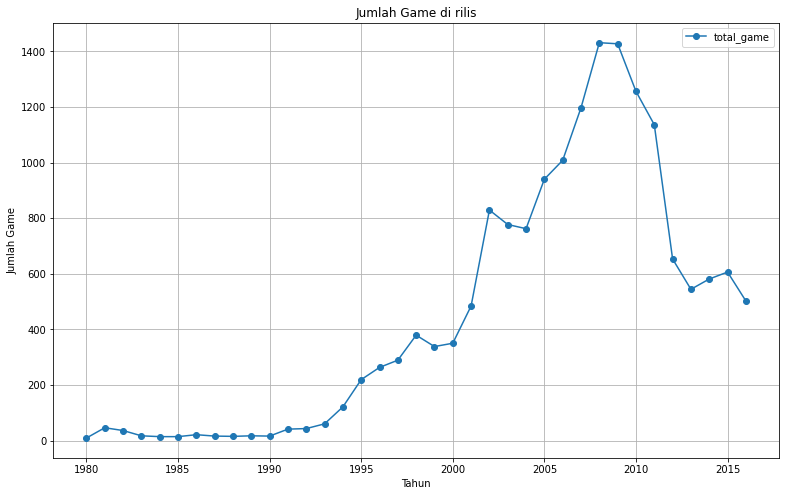

In [ ]:
# Membuat plot untuk jumlah game yang dirilis pada tahun yang berbeda
game_year_release.plot(x='tahun_rilis', y='total_game', xlabel='Tahun', ylabel='Jumlah Game', style='o-', title='Jumlah Game di rilis', grid=True, figsize=(13, 8))

Beradasarkan jumlah hasil analisa saya temua bahwa ada beberapa hal yang menarik:

- untuk tahun 2001-2008, bahwa game yang dirilis mengalami peningkatan yang signifikan, walaupun sempat di tahun 2002 s/d 2004 game yang dirilis mengalami penurunan.
- untuk tahun 2011-2016, bahwa game yang dirilis mengalami penurunan yang signifikan, walaupun sempat di tahun 2013 s/d 2015 game yang dirilis mengalami kenaikan. 

Bahwa dari tahun 2008 s/d 2016 perilisan game mulai mengalami penurunan yang cukup signifikan, bisa saya mempunyai beberapa asumsi untuk terkait penurunan ini.

- Di mulai dari 2008 bahwa kemungkinan studio game mengeluarkan game-game yang dirilis sedikit karena krisis global. Mereka bisa saja mengubah strategi untuk perilisan game yang berhubungan dengan budget.
- Bahwa dari analisa saya platform game-game untuk data ini mayoritas adalah untuk konsol. Bahwa kita tau era 2000 ke atas sudah mulai banyak ke juga seperti handphone, dan tahun 2007 awal untuk berkembangan smartphone yang dimana game untuk smartphone mulai pada bermunculan.

Dari analisa diatas dapat disimpulkan bahwa tahun perilisan yang akan saya ambil untuk analisa lebih lanjut yang mempunyai periode yang signifikan yaitu dari tahun 2000 s/d tahun 2016.

In [ ]:
# Memfilter untuk game yang tahun rilisnya dari 2000 s/d 2016
game_year_filter = game_year_release.query('tahun_rilis >= 2000')
game_year_filter = game_year_filter.set_index('tahun_rilis')
game_year_filter.sort_values(by='total_game', ascending=False)

,total_game
tahun_rilis,
2008,1431
2009,1427
2010,1256
2007,1197
2011,1136
2006,1008
2005,940
2002,829
2003,777


<AxesSubplot:title={'center':'Jumlah Game di rilis'}, xlabel='Tahun', ylabel='Jumlah Game'>

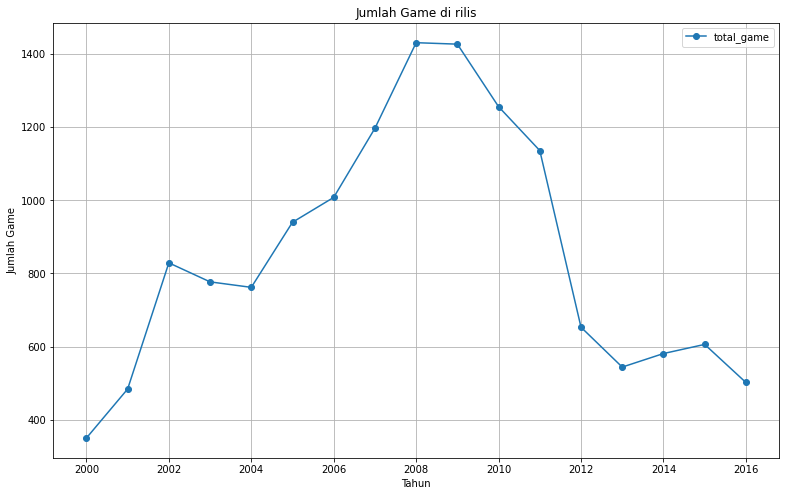

In [ ]:
# Membuat plot yang sudah difilter untuk jumlah game yang dirilis pada tahun 2000 ke atas
game_year_filter.plot(xlabel='Tahun', ylabel='Jumlah Game', style='o-', title='Jumlah Game di rilis', grid=True, figsize=(13, 8))

sudah dilakukan untuk memfilter data yang hanya berisi penjualan dari tahun 2000 s/d tahun 2016.

## Analisa untuk platform

In [ ]:
# Memfilter total rilis game berdasarkan tahunnya
platform_total_sales = (pd
                        .pivot_table(data_game, index='platform', values='total_sales', aggfunc='sum')
                        .sort_values(by=['total_sales'], ascending=False).reset_index())
platform_total_sales

,platform,total_sales
0,PS2,1242.30
1,X360,961.82
2,PS3,931.82
3,Wii,897.46
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,291.65
9,3DS,257.81


<AxesSubplot:title={'center':'Jumlah Total Penjualan Berdasarkan Platform'}, xlabel='Platform', ylabel='Total Penjualan'>

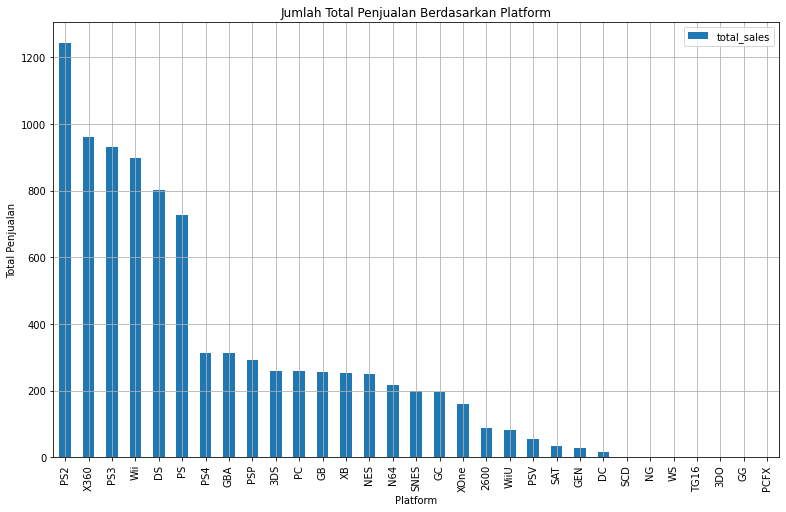

In [ ]:
# Membuat diagram batang untuk jumlah penjualan berdasarkan platformnya
platform_total_sales.sort_values('total_sales', ascending=False).plot(x='platform', y='total_sales', kind='bar', xlabel='Platform', ylabel='Total Penjualan', title='Jumlah Total Penjualan Berdasarkan Platform', grid=True, figsize=(13, 8))

Beradasarkan jumlah hasil analisa saya temua bahwa ada beberapa hal yang menarik:

- Ada 6 platform yang penjualannya sangat tinggal, yaitu: PS2, X360, PS3, Wii, DS, PS.
- Untuk platform sisanya, ada platform yang dimana penjualannya dapat memberikan total penjualan lebih dari 200 juta USD.

Setelah 6 platform bahwa selanjutnya penjualannya yang kurang tinggi, meskipun begitu bahwa platform-platform ini mempunyai potensi dapat memberikan keuntungan di tahun-tahun mendatang.

Untuk acuan tahun selanjutnya yaitu tahun 2017, maka perlu adanya histori data yang menjual game di platformnya sampai 2016 sebagai tahun terakhir, karena bisa diasumsikan bahwa untuk platform yang mempunyai penjualan sampai tahun 2016 masih dianggap game-game untuk platform itu masih akan dapat dijual dan berpotensi untuk menghasilkan keuntungan dari penjualan untuk game dari platform tersebut.

In [ ]:
# Membuat pivot table untuk menganalisa platform yang masih bisa menjual game di platfornya
platform_2016 = pd.pivot_table(data_game, 
                               columns='year_of_release', index='platform', 
                               values='total_sales', aggfunc='sum').reset_index()
platform_2016

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
3,DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
5,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,4.89,5.57,25.49,NaN,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,4.33,12.64,0.65,8.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Membuat list platform tahun 2016
list_platform_2016 = list(platform_2016.loc[~platform_2016[2016].isna(), 'platform'])
list_platform_2016

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

In [ ]:
# Memfilter data untuk platform list penjulan yang masih ada di tahun 2016
platform_filter1 = data_game.query('platform == @list_platform_2016')
platform_filter1

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16449,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,Unidentified,0.01
16452,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,Unidentified,0.01
16453,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,Unidentified,0.01
16454,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,Unidentified,0.01


In [ ]:
# Membuat info platformnya untuk melihat total semua penjulan
platform_filter2 = (platform_filter1
                    .groupby('platform').sum()
                    .sort_values(by='total_sales', ascending=False)
                    ['total_sales'].reset_index())
platform_filter2

,platform,total_sales
0,X360,961.82
1,PS3,931.82
2,Wii,897.46
3,PS4,314.14
4,3DS,257.81
5,PC,257.52
6,XOne,159.32
7,WiiU,82.19
8,PSV,53.81


<AxesSubplot:title={'center':'Jumlah Total Penjualan Berdasarkan Platform'}, xlabel='Platform', ylabel='Total Penjualan'>

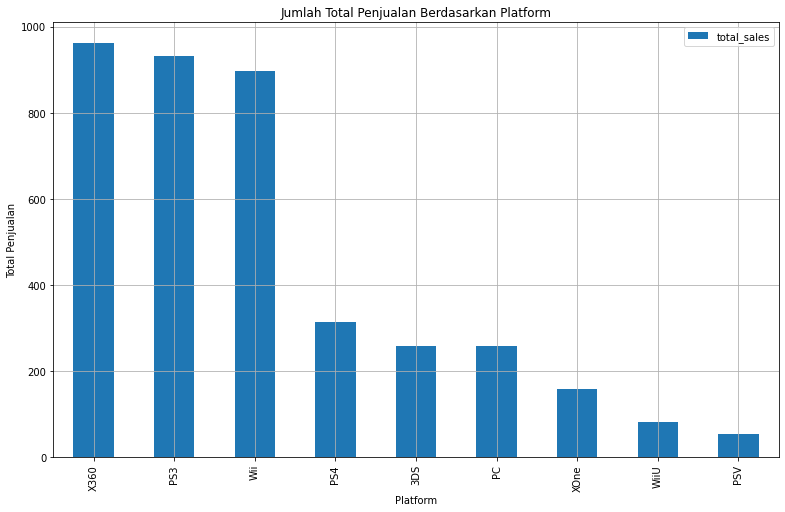

In [ ]:
# Membuat diagram batang untuk jumlah penjualan berdasarkan platformnya yang sudah difilter
platform_filter2.sort_values('total_sales', ascending=False).plot(x='platform', y='total_sales', kind='bar', xlabel='Platform', ylabel='Total Penjualan', title='Jumlah Total Penjualan Berdasarkan Platform', grid=True, figsize=(13, 8))

In [ ]:
platform_filter_sales2 = pd.pivot_table(platform_filter1, columns='platform', index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
platform_filter_sales2

platform,year_of_release,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
0,1985,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,NaN,12.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995,NaN,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1996,NaN,10.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1997,NaN,11.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1998,NaN,3.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1999,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN


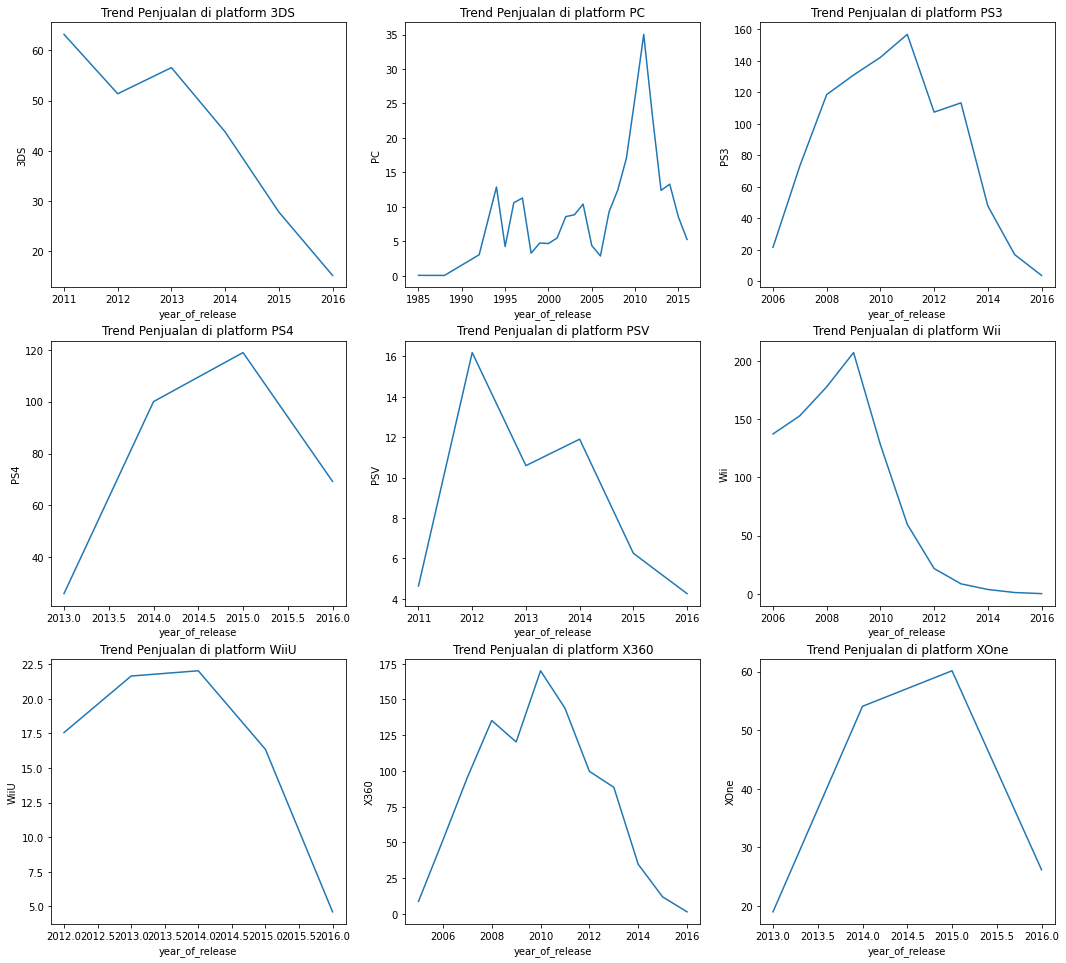

In [ ]:
# Membuat histogram plot untuk masing-masing platform yang telah difilter
plt.figure(figsize=(18, 40))
i = 1
for platform in list_platform_2016:
    plt.subplot(7, 3, i)
    plt.title(f'Trend Penjualan di platform {platform}')
    sns.lineplot(data=platform_filter_sales2, x='year_of_release', y=platform)
    i = i + 1
plt.show()

Berdasarkan hasil grafik plot bahwa ada beberapa poin menarik:

- Bahwa rata-rata penjualan game dengan kurang 5 tahun adalah penjualan yang banyak terjual gamenya untuk masing-masing platform.
- Game dengan penjualan lebih dari 5 tahun akan mengalami penurunan dalam trend penjulannya akan mulai mengalami penuruanan di masing-masing platform.
- Banyak platform yang penjualan game-gamenya tidak ada yang bisa sampai tahun 2016, bahkan ada yang kurang dari tahun 2010 sudah tidak menjual gamenya di platform-platformnya.
- Adapun list-list game yang kurang dari tahun 2016 sudah tidak menjual gamenya di platformnya, yaitu: SNES, N64, NES, XB, GB, GBA, DS, , PS2, PSP, dan PS.

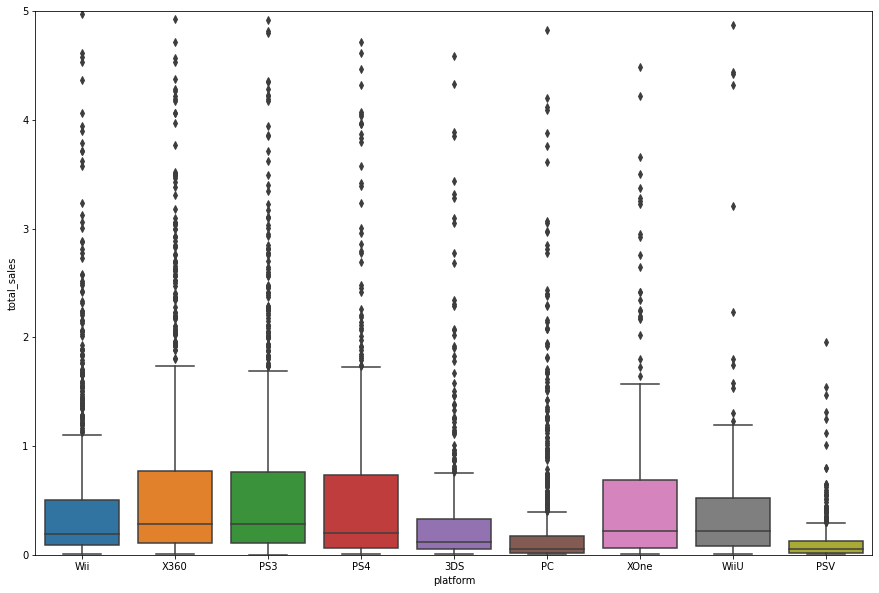

In [ ]:
# Boxplot untuk melihat signifikan penjualan
plt.figure(figsize= (15,10))
sns.boxplot(data=platform_filter1 , x='platform', y='total_sales')
plt.ylim([0,5])
plt.show()

In [ ]:
# Melihat rata-rata penjulaan untuk masing-masing platform yang sudah filter
platform_filter1.pivot_table(index = 'platform', values = ['total_sales'], aggfunc = ['mean'])

,mean
,total_sales
platform,
3DS,0.503535
PC,0.268530
PS3,0.712946
PS4,0.801378
PSV,0.125431
Wii,0.696245
WiiU,0.559116
X360,0.780065


Setelah dilakukan eksplorasi dengan boxplot dan melihat rata-rata penjualan berdasarkan platform dapat disimpulkan:

- PS4, X360, PS3, XOne memiliki rata-rata penjualan yang tinggi.
- PSV memiliki penjualan yang paling rendah, bahkan di liat dari outliernya tidak ada 1 game dengan harga yang sangat tinggi.
- PC memiliki rata-rata penjualan yang rendah, tapi ada beberapa game yang mempunyai harga jual tertentu yang tinggi, hal ini dapat dilihat dari outliernya.
- WiiU dan Wii memiliki sedikit game tertentu dengan harga jual yang tinggi, dan rata-rata gamenya tidak setinggi pada platform-platform poin pertama. 

## Melihat hubungan antara rating profesional dan rating user terhadap tingkat penjualan game di maisng-masing platform

In [ ]:
# membuat variabel yang diperlukan untuk melihat korelasi berdasarkan platform
platform_korelasi = data_game[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
platform_korelasi

,platform,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,Wii,41.36,28.96,3.77,8.45,76,8.0,82.54
1,NES,29.08,3.58,6.81,0.77,0,0.0,40.24
2,Wii,15.68,12.76,3.79,3.29,82,8.3,35.52
3,Wii,15.61,10.93,3.28,2.95,80,8.0,32.77
4,GB,11.27,8.89,10.22,1.00,0,0.0,31.38
...,...,...,...,...,...,...,...,...
16452,PS3,0.00,0.00,0.01,0.00,0,0.0,0.01
16453,X360,0.00,0.01,0.00,0.00,0,0.0,0.01
16454,PSV,0.00,0.00,0.01,0.00,0,0.0,0.01
16455,GBA,0.01,0.00,0.00,0.00,0,0.0,0.01


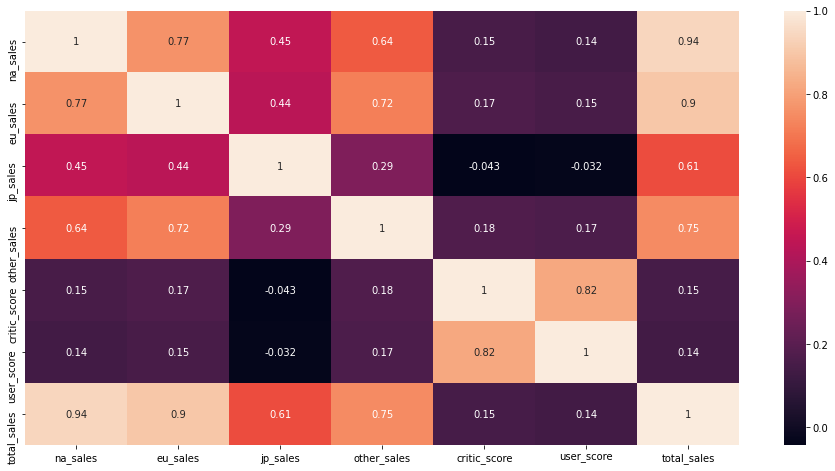

In [ ]:
# Melihat korelasi secara keseluruhan (tanpa platform)
plt.figure(figsize=(16, 8))
sns.heatmap(platform_korelasi.corr(), annot=True)
plt.show()

### Korelasi Score dan Penjualan pada Platform 3DS

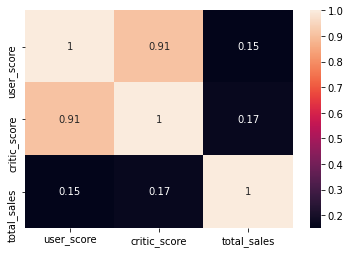

Scatter Plot untuk Platform 3DS


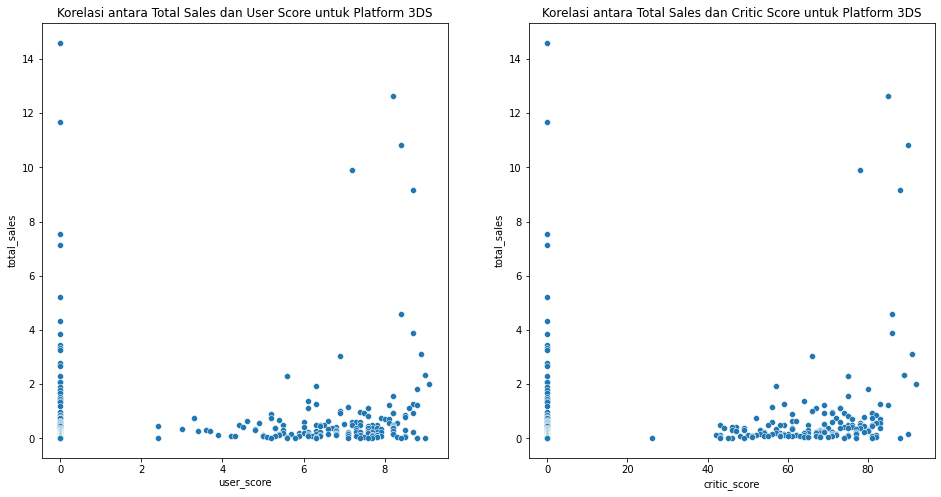

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform 3DS
query_3ds = platform_korelasi.query('platform == "3DS"')
list_korelasi_3ds = platform_korelasi.query('platform == "3DS"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_3ds.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform 3DS')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform 3DS')
sns.scatterplot(data=query_3ds, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform 3DS')
sns.scatterplot(data=query_3ds, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `3DS` korelasinya sangatlah lemah dengan nilai sekitar 0.1 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Hal ini juga bisa di buktikan dengan scatterplot yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi.

### Korelasi Score dan Penjualan pada Platform PC

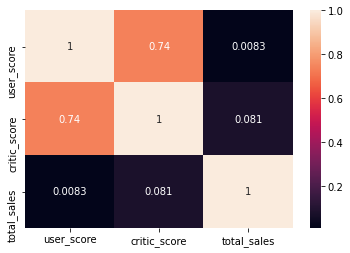

Scatter Plot untuk Platform PC


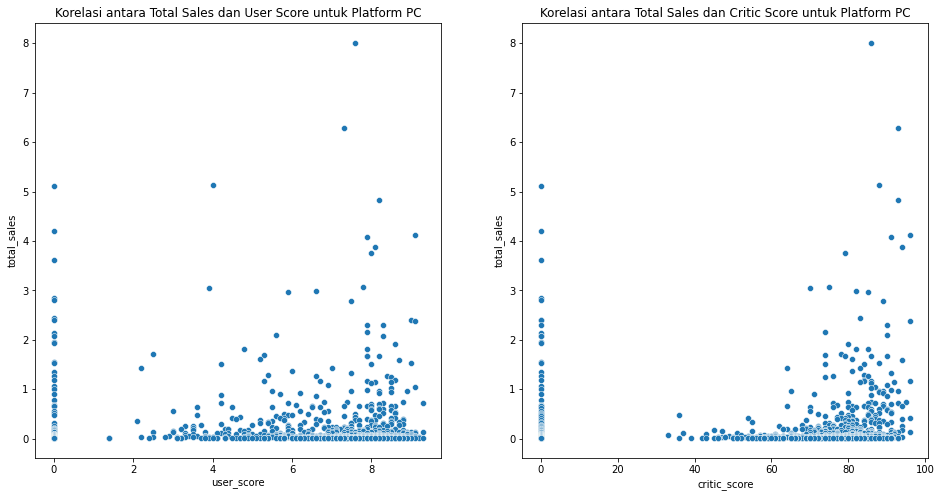

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform PC
query_pc = platform_korelasi.query('platform == "PC"')
list_korelasi_pc = platform_korelasi.query('platform == "PC"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_pc.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform PC')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform PC')
sns.scatterplot(data=query_pc, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform PC')
sns.scatterplot(data=query_pc, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `PC` korelasinya sangatlah lemah dengan nilai dibawah 0.1 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Hal ini juga bisa di buktikan dengan scatterplot yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi.

### Korelasi Score dan Penjualan pada Platform PS3

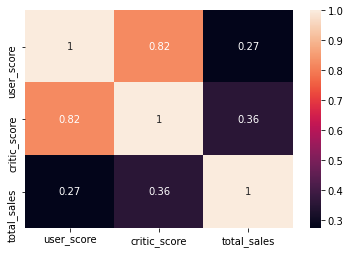

Scatter Plot untuk Platform PS3


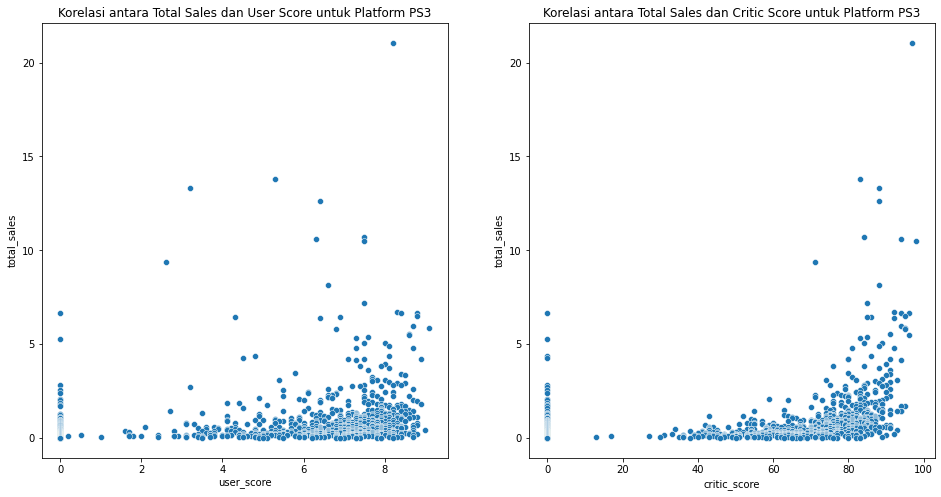

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform PS3
query_ps3 = platform_korelasi.query('platform == "PS3"')
list_korelasi_ps3 = platform_korelasi.query('platform == "PS3"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_ps3.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform PS3')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform PS3')
sns.scatterplot(data=query_ps3, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform PS3')
sns.scatterplot(data=query_ps3, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `PS3` korelasinya ada yang lemah dan ada yang menengah lemah dengan nilai sekitar 0.27 dan 0.36 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Dan melihat scatter plot bahwa mungkin hanya ada beberapa game yang memiliki pengaruh antara `user_score` dan `critic_score` terhadap `total_sales`. Tetapi mayoritas masih melemah dengan di buktikan scatterplot yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi.


### Korelasi Score dan Penjualan pada Platform PS4

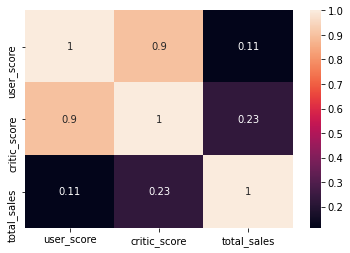

Scatter Plot untuk Platform PS4


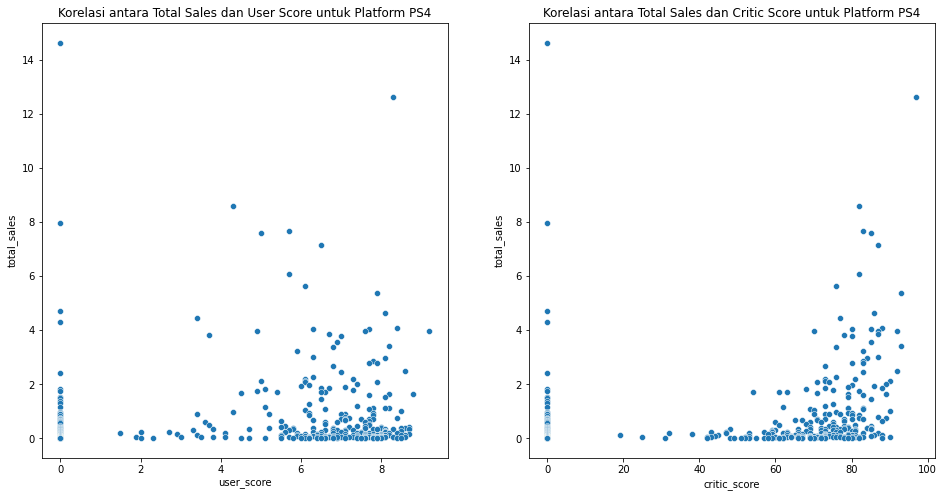

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform PS4
query_ps4 = platform_korelasi.query('platform == "PS4"')
list_korelasi_ps4 = platform_korelasi.query('platform == "PS4"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_ps4.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform PS4')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform PS4')
sns.scatterplot(data=query_ps4, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform PS4')
sns.scatterplot(data=query_ps4, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `PS4` korelasinya sangatlah lemah dengan nilai sekitar 0.1 dan 0.2 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Hal ini juga bisa di buktikan dengan scatterplot yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi.

### Korelasi Score dan Penjualan pada Platform PSV

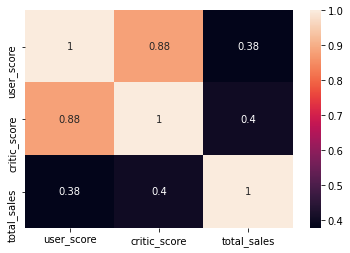

Scatter Plot untuk Platform PSV


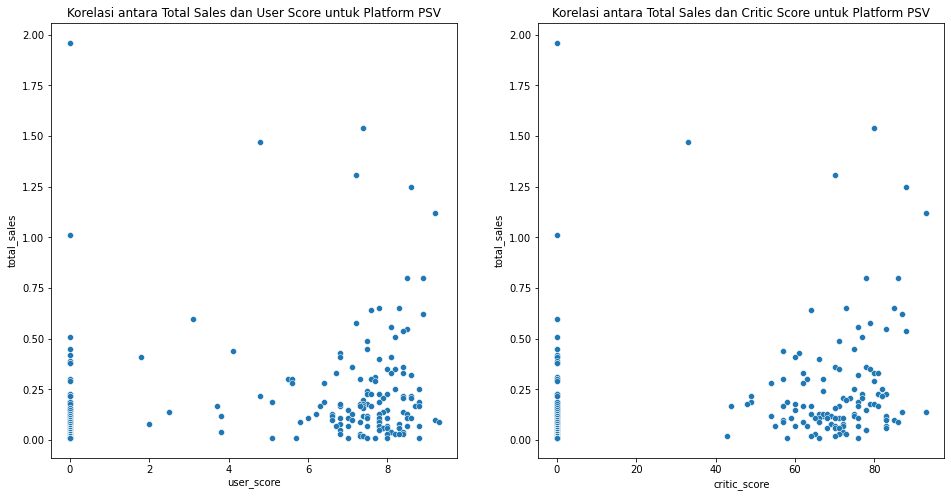

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform PSV
query_psv = platform_korelasi.query('platform == "PSV"')
list_korelasi_psv = platform_korelasi.query('platform == "PSV"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_psv.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform PSV')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform PSV')
sns.scatterplot(data=query_psv, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform PSV')
sns.scatterplot(data=query_psv, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `PSV` korelasinya menengah dengan nilai sekitar 0.3 dan 0.4 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Dan melihat scatter plot bahwa beberapa game yang memiliki pengaruh antara `user_score` dan `critic_score` terhadap `total_sales`. Tetapi masih ada game-game yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi di buktikan dengan scatterplot diatas.

### Korelasi Score dan Penjualan pada Platform Wii

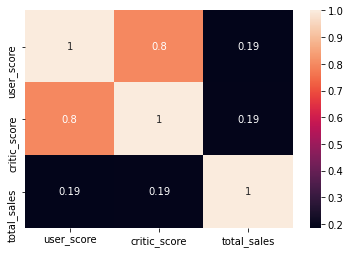

Scatter Plot untuk Platform Wii


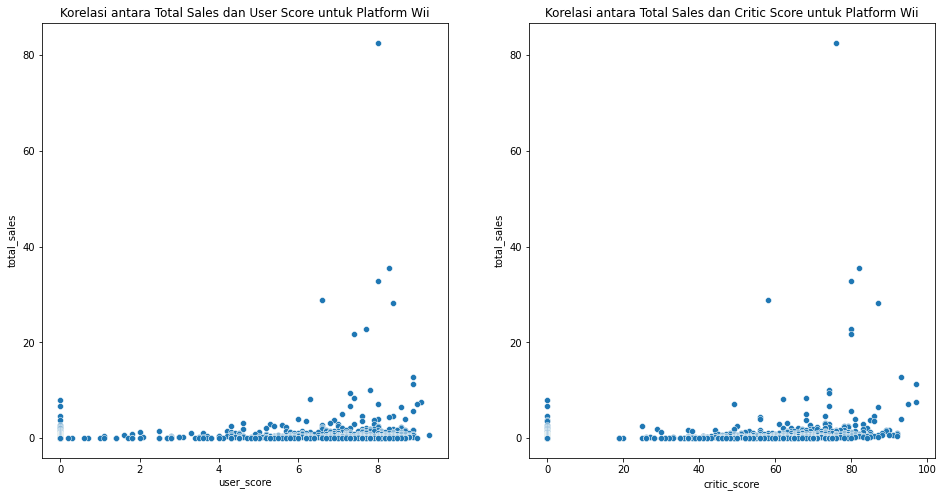

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform Wii
query_wii = platform_korelasi.query('platform == "Wii"')
list_korelasi_wii = platform_korelasi.query('platform == "Wii"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_wii.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform Wii')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform Wii')
sns.scatterplot(data=query_wii, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform Wii')
sns.scatterplot(data=query_wii, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `Wii` korelasinya sangatlah lemah dengan nilai sekitar 0.1 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Hal ini juga bisa di buktikan dengan scatterplot yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0.

### Korelasi Score dan Penjualan pada Platform WiiU

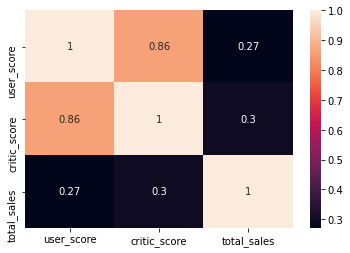

Scatter Plot untuk Platform WiiU


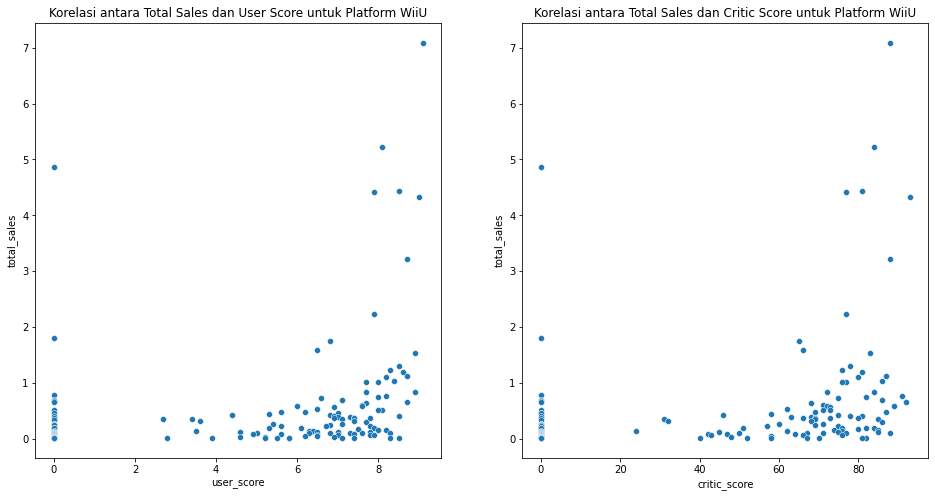

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform WiiU
query_wiiu = platform_korelasi.query('platform == "WiiU"')
list_korelasi_wiiu = platform_korelasi.query('platform == "WiiU"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_wiiu.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform WiiU')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform WiiU')
sns.scatterplot(data=query_wiiu, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform WiiU')
sns.scatterplot(data=query_wiiu, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `WiiU` korelasinya lemah menengah dengan nilai sekitar 0.2 dan 0.3 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Dan melihat scatter plot bahwa mungkin hanya ada beberapa game yang memiliki pengaruh antara `user_score` dan `critic_score` terhadap `total_sales`. Tetapi mayoritas masih melemah dengan di buktikan yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi.

### Korelasi Score dan Penjualan pada Platform X360

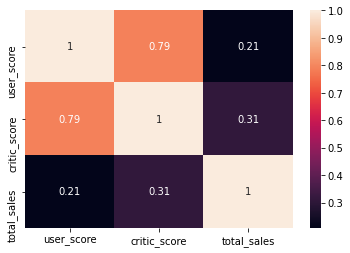

Scatter Plot untuk Platform X360


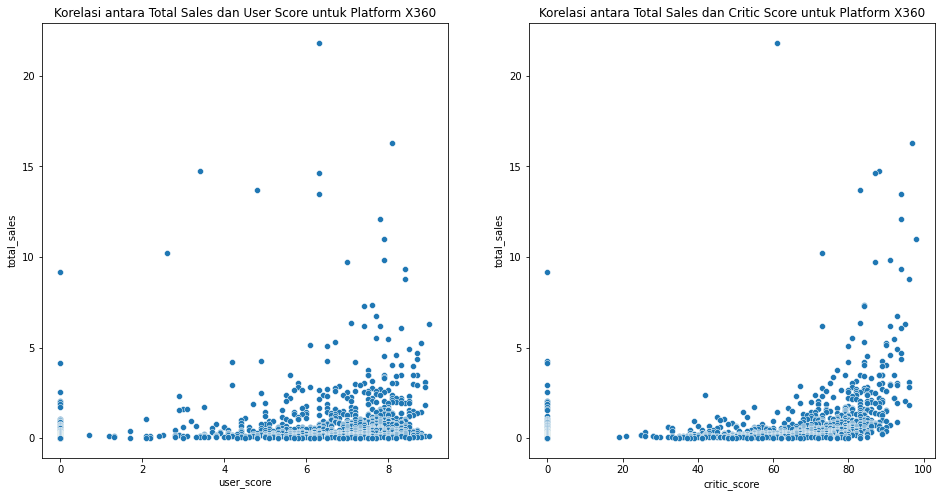

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform X360
query_x360 = platform_korelasi.query('platform == "X360"')
list_korelasi_x360 = platform_korelasi.query('platform == "X360"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_x360.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform X360')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform X360')
sns.scatterplot(data=query_x360, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform X360')
sns.scatterplot(data=query_x360, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `X360` korelasinya lemah menengah dengan nilai sekitar 0.2 dan 0.3 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Dan melihat scatter plot bahwa mungkin hanya ada beberapa game yang memiliki pengaruh antara `user_score` dan `critic_score` terhadap `total_sales`. Tetapi mayoritas masih melemah dengan di buktikan yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi.

### Korelasi Score dan Penjualan pada Platform XOne

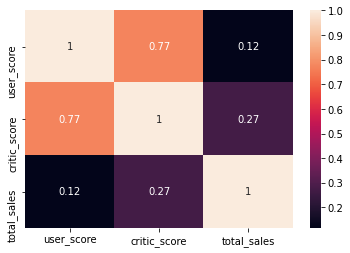

Scatter Plot untuk Platform XOne


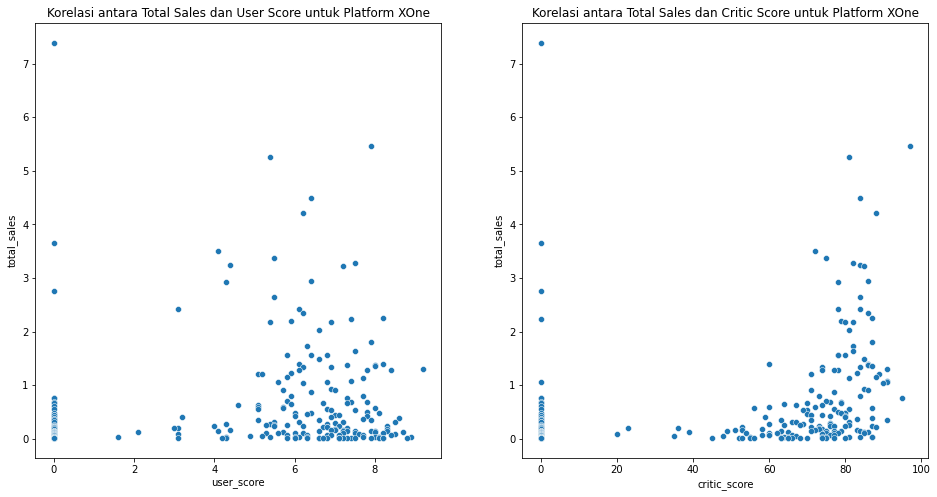

In [ ]:
# Korelasi Skor dengan Penjualn untuk platform XOne
query_xone = platform_korelasi.query('platform == "XOne"')
list_korelasi_xone = platform_korelasi.query('platform == "XOne"')[['platform', 'user_score', 'critic_score', 'total_sales']]

sns.heatmap(list_korelasi_xone.corr(), annot=True)
plt.show()

print(f'Scatter Plot untuk Platform XOne')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Korelasi antara Total Sales dan User Score untuk Platform XOne')
sns.scatterplot(data=query_xone, x='user_score', y='total_sales')

plt.subplot(1, 2, 2)
plt.title('Korelasi antara Total Sales dan Critic Score untuk Platform XOne')
sns.scatterplot(data=query_xone, x='critic_score', y='total_sales')
plt.show()

Bahwa untuk platform `XOne` korelasinya sangatlah lemah dengan nilai sekitar 0.1 dan 0.2 untuk hubungan antara `total_sales` dengan `user_score` dan `critic_score`.

Hal ini juga bisa di buktikan dengan scatterplot yang dimana mempunyai skor besar untuk `user_score` dan `critic_score`, tetapi `total_sales` memiliki penjualan yang sedikit bahkan mungkin ada yang hampir 0. Dan `user_score` dan `critic_score` yang 0, tetapi memiliki `total_sales` yang tidak 0 bahkan ada yang sangat tinggi.

## Analisa untuk genre game

Amati distribusi umum game berdasarkan genre. Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Dapatkah Anda melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

In [ ]:
# Melihat ganre game yang paling bisa memberi banyak keuntungan dari penjualan
genre_sales = pd.pivot_table(data_game, index='genre', values='total_sales', aggfunc='sum').sort_values(by=['total_sales'], ascending=False).reset_index()
genre_sales

,genre,total_sales
0,Action,1723.19
1,Sports,1320.41
2,Shooter,1042.98
3,Role-Playing,931.08
4,Platform,826.03
5,Misc,792.10
6,Racing,723.49
7,Fighting,442.80
8,Simulation,387.96
9,Puzzle,239.89


<AxesSubplot:title={'center':'Jumlah Total Penjualan Berdasarkan Genre'}, xlabel='Genre', ylabel='Total Penjualan'>

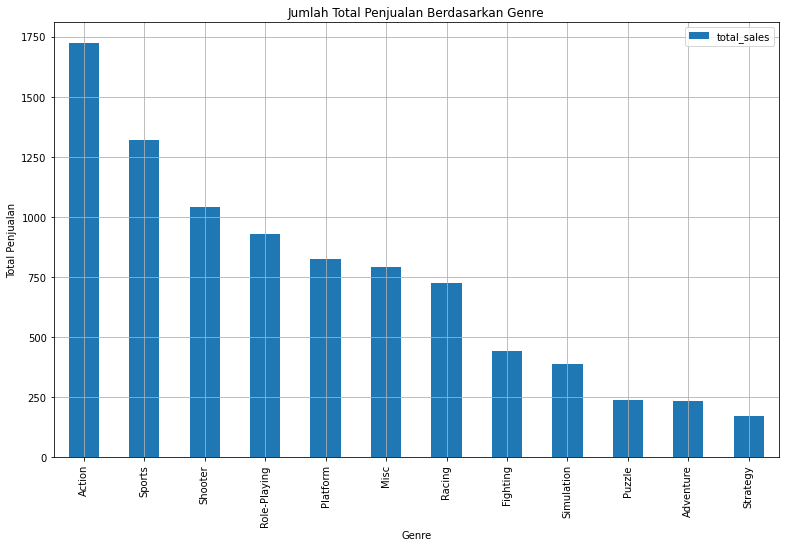

In [ ]:
# Membuat diagram batang untuk jumlah penjualan berdasarkan genre gamenya
genre_sales.plot(x='genre', y='total_sales', kind='bar', xlabel='Genre', ylabel='Total Penjualan', title='Jumlah Total Penjualan Berdasarkan Genre', grid=True, figsize=(13, 8))

Dari diagram ini dapat dilihat bahwa untuk semua game dan semua paltform secara general bahwa genre `Action` adalah ganre yang paling banyak penjualannya. Artinya bisa memberi keuntungan yang plaing banyak jika menjual game dengan genre `Action` untuk game secara general disemua platform. 

Sementara untuk semua game dan semua paltform secara general bahwa genre `Strategy` adalah ganre yang paling sedikit penjualannya. Artinya bisa memberi keuntungan yang paling sedikit jika menjual game dengan genre `Strategy` untuk game secara general disemua platform.

## Analisa berdasarkan wilayah

Untuk setiap wilayah (NA, EU, JP), tentukan:

- 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
- 5 genre teratas. Jelaskan perbedaannya.
- Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

### Analisa Platform, Genre, dan Rating untuk Game di wilayah NA

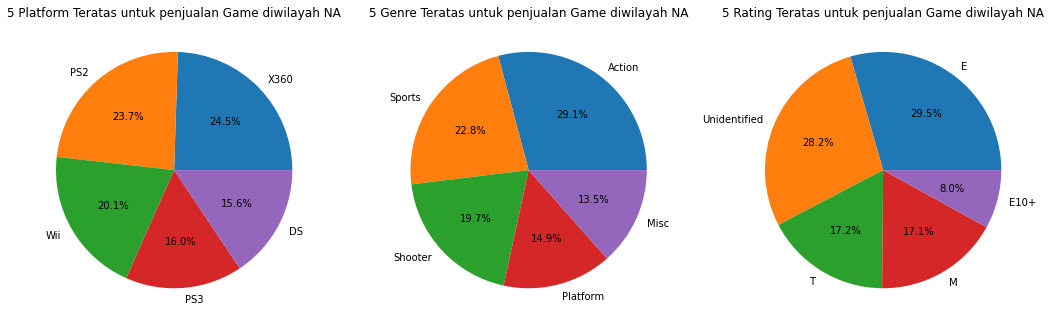

In [ ]:
# membuat list penggunaan platform berdasarkan wilayah NA
top_5_platform_na = pd.pivot_table(data_game, index='platform', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).reset_index().head()
top_5_genre_na = pd.pivot_table(data_game, index='genre', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).reset_index().head()
top_5_rating_na = pd.pivot_table(data_game, index='rating', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).reset_index().head()

# Membuat Pie Chart untuk Platform, Genre, dan Rating berdasarkan wilayah NA
plt.figure(figsize= (18, 8))
plt.subplot(1, 3, 1)
plt.pie(top_5_platform_na['na_sales'], labels =top_5_platform_na['platform'], autopct='%1.1f%%')
plt.title('5 Platform Teratas untuk penjualan Game diwilayah NA')
# top_5_platform_na.plot(kind='pie', y='na_sales',autopct='%1.1f%%', figsize=(10, 5), legend=False, title='5 Platform Teratas untuk penjualan wilayah NA')

plt.subplot(1, 3, 2)
plt.pie(top_5_genre_na['na_sales'], labels =top_5_genre_na['genre'], autopct='%1.1f%%')
plt.title('5 Genre Teratas untuk penjualan Game diwilayah NA')
# top_5_genre_na.plot(kind='pie', y='na_sales', autopct='%1.1f%%', figsize=(10, 5), legend=False, title='5 Genre Teratas untuk penjualan wilayah NA')

plt.subplot(1, 3, 3)
plt.pie(top_5_rating_na['na_sales'], labels =top_5_rating_na['rating'], autopct='%1.1f%%')
plt.title('5 Rating Teratas untuk penjualan Game diwilayah NA')

plt.show()

Untuk wilayah NA, bahwa 5 platformn teratas untuk penjualan gamenya yaitu:

- X360 dengan pangsa pasar sebesar 24.5%.
- PS2 dengan pangsa pasar sebesar 23.7%.
- Wii dengan pangsa pasar sebesar 20.1%.
- PS3 dengan pangsa pasar sebesar 16%.
- DS dengan pangsa pasar sebesar 15.6%.

Untuk wilayah NA, bahwa 5 genre teratas untuk penjualan gamenya yaitu:

- genre Action dengan pangsa pasar sebesar 29.1%.
- genre Sports dengan pangsa pasar sebesar 22.8%.
- genre Shooter dengan pangsa pasar sebesar 19.7%.
- genre Platform dengan pangsa pasar sebesar 14.9%.
- genre Misc dengan pangsa pasar sebesar 13.5%.

Untuk wilayah NA, bahwa 5 rating teratas untuk penjualan gamenya yaitu:

- Rating E (Everyone) dengan pangsa pasar sebesar 29.5%.
- Rating Unidentified dengan pangsa pasar sebesar 28.2%
- Rating T (Teen) dengan pangsa pasar sebesar 17.2%
- Rating M (Mature) dengan pangsa pasar sebesar 17.1%
- Rating E10+ (Everyone 10 and Older) dengan pangsa pasar sebesar 8.0%

### Analisa Platform, Genre, dan Rating untuk Game di wilayah EU

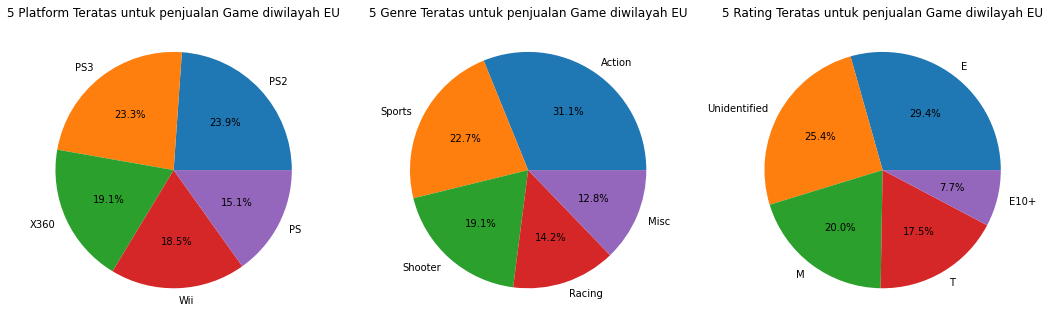

In [ ]:
# membuat list penggunaan platform berdasarkan wilayah EU
top_5_platform_eu = pd.pivot_table(data_game, index='platform', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).reset_index().head()
top_5_genre_eu = pd.pivot_table(data_game, index='genre', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).reset_index().head()
top_5_rating_eu = pd.pivot_table(data_game, index='rating', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).reset_index().head()

# top_5_platform_eu.plot(kind='pie', y='eu_sales',autopct='%1.1f%%', figsize=(10, 5), legend=False, title='5 Platform Teratas untuk penjualan wilayah EU')

# Membuat Pie Chart untuk Platform, Genre, dan Rating berdasarkan wilayah EU
plt.figure(figsize= (18, 8))
plt.subplot(1, 3, 1)
plt.pie(top_5_platform_eu['eu_sales'], labels =top_5_platform_eu['platform'], autopct='%1.1f%%')
plt.title('5 Platform Teratas untuk penjualan Game diwilayah EU')

plt.subplot(1, 3, 2)
plt.pie(top_5_genre_eu['eu_sales'], labels =top_5_genre_eu['genre'], autopct='%1.1f%%')
plt.title('5 Genre Teratas untuk penjualan Game diwilayah EU')

plt.subplot(1, 3, 3)
plt.pie(top_5_rating_eu['eu_sales'], labels =top_5_rating_eu['rating'], autopct='%1.1f%%')
plt.title('5 Rating Teratas untuk penjualan Game diwilayah EU')

plt.show()

Untuk wilayah EU bahwa 5 platformn teratas untuk penjualan gamenya yaitu:

- PS2 dengan pangsa pasar sebesar 23.9%.
- PS3 dengan pangsa pasar sebesar 23.3%.
- X360 dengan pangsa pasar sebesar 19.1%.
- Wii dengan pangsa pasar sebesar 18.5%.
- PS dengan pangsa pasar sebesar 15.1%.

Untuk wilayah EU, bahwa 5 genre teratas untuk penjualan gamenya yaitu:

- genre Action dengan pangsa pasar sebesar 31.1%.
- genre Sports dengan pangsa pasar sebesar 22.7%.
- genre Shooter dengan pangsa pasar sebesar 19.1%.
- genre Racing dengan pangsa pasar sebesar 14.2%.
- genre Misc dengan pangsa pasar sebesar 12.8%.

Untuk wilayah EU, bahwa 5 rating teratas untuk penjualan gamenya yaitu:

- Rating E (Everyone) dengan pangsa pasar sebesar 29.4%.
- Rating Unidentified dengan pangsa pasar sebesar 25.4%
- Rating M (Mature) dengan pangsa pasar sebesar 20.0%
- Rating T (Teen) dengan pangsa pasar sebesar 17.5%
- Rating E10+ (Everyone 10 and Older) dengan pangsa pasar sebesar 7.7%

### Analisa Platform, Genre, dan Rating untuk Game di wilayah JP

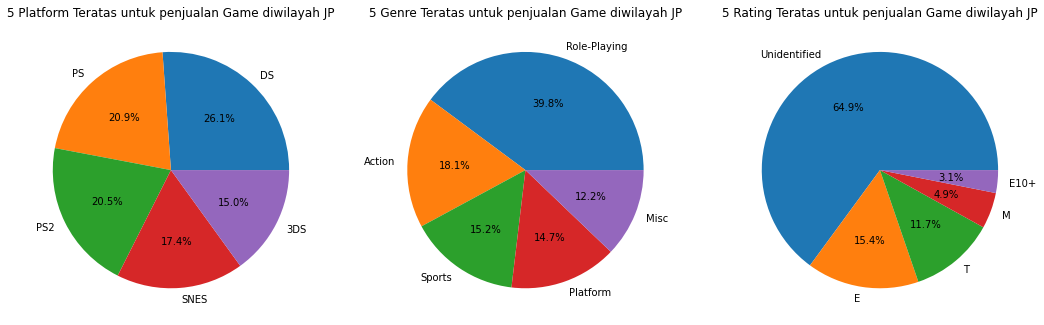

In [ ]:
# membuat list penggunaan platform berdasarkan wilayah JP
top_5_platform_jp = pd.pivot_table(data_game, index='platform', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).reset_index().head()
top_5_genre_jp = pd.pivot_table(data_game, index='genre', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).reset_index().head()
top_5_rating_jp = pd.pivot_table(data_game, index='rating', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).reset_index().head()

# top_5_platform_jp.plot(kind='pie', y='jp_sales',autopct='%1.1f%%', figsize=(10, 5), legend=False, title='5 Platform Teratas untuk penjualan wilayah JP')

# Membuat Pie Chart untuk Platform, Genre, dan Rating berdasarkan wilayah JP
plt.figure(figsize= (18, 8))
plt.subplot(1, 3, 1)
plt.pie(top_5_platform_jp['jp_sales'], labels =top_5_platform_jp['platform'], autopct='%1.1f%%')
plt.title('5 Platform Teratas untuk penjualan Game diwilayah JP')

plt.subplot(1, 3, 2)
plt.pie(top_5_genre_jp['jp_sales'], labels =top_5_genre_jp['genre'], autopct='%1.1f%%')
plt.title('5 Genre Teratas untuk penjualan Game diwilayah JP')

plt.subplot(1, 3, 3)
plt.pie(top_5_rating_jp['jp_sales'], labels =top_5_rating_jp['rating'], autopct='%1.1f%%')
plt.title('5 Rating Teratas untuk penjualan Game diwilayah JP')

plt.show()

Untuk wilayah JP, bahwa 5 platformn teratas untuk penjualan gamenya yaitu:

- DS dengan pangsa pasar sebesar 26.1%.
- PS dengan pangsa pasar sebesar 20.9%.
- PS2 dengan pangsa pasar sebesar 20.5%.
- SNES dengan pangsa pasar sebesar 17.4%.
- 3DS dengan pangsa pasar sebesar 15%.

Untuk wilayah JP, bahwa 5 genre teratas untuk penjualan gamenya yaitu:

- genre Role-Playing dengan pangsa pasar sebesar 39.8%.
- genre Action dengan pangsa pasar sebesar 18.1%.
- genre Sports dengan pangsa pasar sebesar 15.2%.
- genre Platform dengan pangsa pasar sebesar 14.7%.
- genre Misc dengan pangsa pasar sebesar 12.2%.

Untuk wilayah JP, bahwa 5 rating teratas untuk penjualan gamenya yaitu:

- Rating Unidentified dengan pangsa pasar sebesar 64.9%.
- Rating E (Everyone) dengan pangsa pasar sebesar 15.4%.
- Rating T (Teen) dengan pangsa pasar sebesar 11.7%.
- Rating M (Mature) dengan pangsa pasar sebesar 4.9%.
- Rating E10+ (Everyone 10 and Older) dengan pangsa pasar sebesar 3.1%.

# Melakukan Uji Hipotesis

- Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- Rata-rata rating pengguna genre Action dan Sports berbeda.

Tetapkan sendiri nilai ambang batas alpha.

Jelaskan:

- Bagaimana Anda merumuskan hipotesis nol dan hipotesis alternatif
- Berapa tingkat signifikansi yang Anda pilih untuk menguji hipotesis, dan jelaskan alasan Anda memilih angka tersebut

Standar yang digunakan untuk Uji-Hipotesis adalah 0.05 (5%). Karena itu merupakan standar terbaik untuk segala sektor dalam menguji hipotesisnya dan kebutuhan juga tidak terlalu mendesak atau penting, tetapi tidak terlalu santai karena digunakan untuk bisnis.

## Uji Hipotesis untuk rating pengguna Xbox One (XOne) dan PC

Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

- **H0** : Rata-rata rating pengguna platform Xbox One dan PC adalah **SAMA**.

- **H1** : Rata-rata rating pengguna platform Xbox One dan PC adalah **TIDAK SAMA**.

In [ ]:
# Membuat varibel untuj XOne dan PC
xone_user = data_game.query('platform == "XOne"')
pc_user = data_game.query('platform == "PC"')

In [ ]:
# Menguji Hipotesis untuk rata-rata rating pengguna xbox one dan pc

H0 = 'rata-rata rating pengguna platform Xbox One dan PC adalah sama.'
H1 = 'rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.'

alpha = 0.05
results_xone_pc = st.ttest_ind(xone_user['user_score'], pc_user['user_score'],equal_var=False)
print('p-value:', results_xone_pc.pvalue)

if (results_xone_pc.pvalue < alpha):
    print(f'Tolak H0, artinya bahwa', H1)
else:
    print(f'Tidak bisa tolak H0, artinya bahwa', H0)

p-value: 0.0006071141540886165
Tolak H0, artinya bahwa rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.


Karena rata-rata rating pengguna platform Xbox One dan PC itu tidak sama. Mari buktikan dengan menghitung rata-rata `user_score` untuk pengguna Xbonx One dan PC.

In [ ]:
# Melihat rata-rata untuk rating pengguna platform Xbox One dan PC
print(f'Rata-rata rating pengguna platform Xbox One adalah :', xone_user['user_score'].mean())
print(f'Rata-rata rating pengguna platform PC adalah :', pc_user['user_score'].mean())

Rata-rata rating pengguna platform Xbox One adalah : 4.805263157894737
Rata-rata rating pengguna platform PC adalah : 5.576642335766423


Kesimpulan : Bahwa Uji-Hipotesis membukti rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama dengan dikuatkan untuk penghitungan rata-rata secara manual untuk Xbox One dan PC satu per-satu.

## Uji Hipotesis untuk rating user game genre Action dan Sport

Rata-rata rating pengguna genre Action dan Sports berbeda.

- **H0** : Rata-rata rating user game genre Action dan Sports adalah **TIDAK BERBEDA**.

- **H1** : Rata-rata rating user game genre Action dan Sports adalah **BERBEDA**.

In [ ]:
# Membuat varibel untuk genre Action dan Sport
action_user = data_game.query('genre == "Action"')
sports_user = data_game.query('genre == "Sports"')

In [ ]:
# Menguji Hipotesis untuk rata-rata rating user genre Action dan Sport

H0 = 'rata-rata rating user game genre Action dan Sports adalah tidak berbeda.'
H1 = 'rata-rata rating user game genre Action dan Sports adalah berbeda.'

alpha = 0.05
results_action_sports = st.ttest_ind(action_user['user_score'], sports_user['user_score'],equal_var=False)
print('p-value:', results_action_sports.pvalue)

if (results_action_sports.pvalue < alpha):
    print(f'Tolak H0, artinya bahwa', H1)
else:
    print(f'Tidak bisa tolak H0, artinya bahwa', H0)

p-value: 9.309723187347976e-09
Tolak H0, artinya bahwa rata-rata rating user game genre Action dan Sports adalah berbeda.


Karena rata-rata rating user genre Action dan Sports itu tidak sama. Mari buktikan dengan menghitung rata-rata `user_score` untuk user genre Action dan Sports.

In [ ]:
# Melihat rata-rata untuk rating user genre Action dan Sports
print(f'Rata-rata rating user game genre Action adalah :', action_user['user_score'].mean())
print(f'Rata-rata rating user game genre Sports adalah :', sports_user['user_score'].mean())

Rata-rata rating user game genre Action adalah : 3.8363444108761326
Rata-rata rating user game genre Sports adalah : 3.266551276503678


Kesimpulan : Bahwa Uji-Hipotesis membukti rata-rata rating user untuk genre sport dan aksi adalah tidak sama dengan dikuatkan untuk penghitungan rata-rata secara manual untuk genre sport dan aksi satu per-satu.

# Ringakasan, Kesimpulan, & Saran

## Ringkasan

Untuk mengidentifikasi game-game yang dapat dikatakan berhasil atau tidak yang dimana untuk toko daring 'Ice' dalam mengkampanyekan iklannya karena gamenya tersebut mempunyai potensi, dilakukan analisa melalui data ulasan, histori penjualan, platform, dan genre.

ada pun step-stepnya, pertama memuat file dan semua informasi untuk mengetahui keadaan data yang akan di proses pada tahap selanjutnya. Kedua melakukan pra-pemrosesan data yang dimana mengecek kualitas, membersihkan datanya.

Lalu di tahap ekplorasi dan analisis data menentukan ketentuannya, seperti:
- Analisis jumlah game untuk setiap tahun.
- Analisa untuk melihat jumlah penjualannya berdasarkan platform maisng-masing.
- Korelasi untuk ulasan profesional dan ulasan user terhadap platform masing- beserta hubungannya dalam penjualannya.
- Analisa untuk melihat jumlah penjualannya berdasarkan genre.
- Analisa platform, ganre, dan rating untuk melihat jumlah penjualannya berdasarkan wilayah masing-masing.

Selanjutnya adalah tahap uji hipotesis yang dimana menentukan rata-rata rating suatu platform adalah sama atau tidak, dan tahap uji hipotesis yang dimana menentukan rata-rata rating untuk suatu rating genre apakah sama atau tidak.

Tahap terakhir adalah memberi ringkasan, kasimpulan, saran, dan rekomendasi.

## Kesimpulan

Adapun beberapa poin untuk bisa di simpulkan:

- Bahwa padap tahun 1990 bahwa game yang dirilis terus mengningkat secara segnifikan sampai tahun 2008 yang menjadu puncak perilisan game terbanyak sebanyak 1400 lebih. Setelah tahun 2008 jumlah rilisan game setiap tahunnya menurun sampai tahun akhir yaitu tahun 2016.


- Untuk platform adalah game pada platformnya mempunyai data penjualan kontinu dari tahun 2000 s/d 2016 dan setiap tahun platform tersebut harus mempunyai histori penjualan secara kontinu karena akan dianggap game-game yang ditujukan platform tersebut masih tetap terjual.


- Untuk Hubungan antara ulasan dan penjualan di masing-masing platform tidak saling berkaitan atau mempengaruhi masing-masing hubungan antara kedua tersebut.


- untuk genre bahwa bahwa ada 3 genre teratas yang sangat berpotensi game tersebut sukses dijual dan sangat laku di pasar, yaitu : Aksi, Sport, dan Shooter.

Untuk wilayah di NA, EU, dan JP ada masing-masing jenis game yang unggul berdasarkan platform, genre dan rating, yaitu:

Di wilayah NA:
- Platform 5 teratas X360, PS2, Wii, PS3, DS.
- Genre 5 teratas Action, Sports, Shooter, Platform, Misc.
- Rating 5 teratas E, Unidentified, T, M, E+10.

Di wilayah EU:
- Platform 5 teratas PS2, PS3, X360, Wii, PS.
- Genre 5 teratas Action, Sports, Shooter, Racing, Misc.
- Rating 5 teratas E, Unidentified, M, T, E+10.

Di wilayah JP:
- Platform 5 teratas DS, PS, PS2, SNES, 3DS.
- Genre 5 teratas Role-Playing, Action, Sports, Platform, Misc.
- Rating 5 teratas Unidentified, E, M, T, E+10.

Untuk Uji-Hoptesisnya, bahwa:
- Rata-rata rating pengguna Xbox One (XOne) dan PC adalah berbeda
- Rata-rata rating user game genre Action dan Sports berbeda

Dan uji Hipotesis dibuktikan dengan menghitung rata-rata secara manual untuk masing-masing rating tersebut.

## Saran

Bahwa game yang terbaik untuk dijualkan dan mempunyai potensi keuntungan terbesar adalah game yang mempunyai data untuk penjualan secara kontinu setiap tahunnya sampai tahun terbaru atau tahun terakhir. Karena game yang punya data penjualan sampai tahun terakhir akan dianggap game yang masih ramai dimainkan dan akan bertahan beberapa tahun kedepan untuk terus dijual.

Adapun untuk game yang dijual berdasarkan platform adalah penjualan game yang dimainkan platform sampai tahun 2016 tahun terakhirnya, adapun jenis platform yang dimana ketika menjual game untuk platform tersebut masih akan laku dijual dan menghasilkan keuntungan, yaitu:
- 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne

Sebaiknya tidak usah terlalu memikirkan tentang ulasan-ulasan baik dari user maunpun profesional yang akan berdampak kepada penjualan, pada kenyataannya hal itu tidak berpengaruh untuk penjualan game.

Sebaiknya untuk jenis genre game yang dimana akan berhasil mendatangkan keuntungan yaitu:
- Aksi, Sport, dan Shooter.

Berdasarkan wilayah bahwa untuk wilayah NA ada 5 platform, genre, dan rating yang akan berhasil mendatanga keuntungan yaitu:
- Platform 5 teratas X360, PS2, Wii, PS3, DS.
- Genre 5 teratas Action, Sports, Shooter, Platform, Misc.
- Rating 5 teratas E, Unidentified, T, M, E+10.

Berdasarkan wilayah bahwa untuk wilayah EU ada 5 platform, genre, dan rating yang akan berhasil mendatanga keuntungan yaitu:
- Platform 5 teratas PS2, PS3, X360, Wii, PS.
- Genre 5 teratas Action, Sports, Shooter, Racing, Misc.
- Rating 5 teratas E, Unidentified, M, T, E+10.

Berdasarkan wilayah bahwa untuk wilayah JP ada 5 platform, genre, dan rating yang akan berhasil mendatanga keuntungan yaitu:
Di wilayah JP:
- Platform 5 teratas DS, PS, PS2, SNES, 3DS.
- Genre 5 teratas Role-Playing, Action, Sports, Platform, Misc.
- Rating 5 teratas Unidentified, E, M, T, E+10.